### Images 
in computer systems are represented as a matrix of pixel values. Each pixel holds numbers related to the intensity of the composition of Red, Green, and Blue (RGB values). These values range from 0-255 providing a wide range of colour variations.
Often, it becomes necessary to manipulate and transform images to enhance their visual appearance, extract useful information, or prepare them for further analysis.
1. Image Rotation
Image rotation involves rotating an image by a certain angle. This technique is commonly used to correct image orientation, align objects, or create visually appealing effects.
2. Image Scaling
Image scaling involves resizing an image to a desired size. This technique is useful for standardizing image dimensions, reducing memory consumption, or preparing images for specific applications.
3. Image Translation
Image translation involves shifting an image’s pixels in the horizontal and vertical directions. This technique is useful for correcting alignment issues, creating image mosaics, or simulating camera movements.

An eigenface  is the name given to a set of eigenvectors when used in the computer vision problem of human face recognition. The approach of using eigenfaces for recognition was developed by Sirovich and Kirby and used by Matthew Turk and Alex Pentland in face classification. The eigenvectors are derived from the covariance matrix of the probability distribution over the high-dimensional vector space of face images. The eigenfaces themselves form a basis set of all images used to construct the covariance matrix. This produces dimension reduction by allowing the smaller set of basis images to represent the original training images. Classification can be achieved by comparing how faces are represented by the basis set.

__Eigenface provides an easy and cheap way to realize face recognition in that:__
* Its training process is completely automatic and easy to code.
* Eigenface adequately reduces statistical complexity in face image representation.
* Once eigenfaces of a database are calculated, face recognition can be achieved in real time.
* Eigenface can handle large databases.

Since eigenfaces are obtained through Principal Component Analysis (PCA), they are the eigenvectors of the covariance matrix of the face image dataset. Each eigenface represents a different characteristic facial feature or pattern that is prominent in the dataset.

When visualized, eigenfaces may appear blurry or distorted because they are composed of a combination of different facial features from the dataset. However, despite this blurriness, they still capture the main variations present in the faces, making them recognizable as facial features.

In essence, eigenfaces look like typical faces because they represent the fundamental facial features that are common across the dataset, even though they may be blurred due to the compression of information into a lower-dimensional space during the PCA process.

### Steps for implementing the eigenfaces algorithm for face recognition:

1. Prepare the dataset: Gather a dataset of face images. Each image should be preprocessed to ensure uniform size, lighting conditions, and alignment.
2. Feature extraction: Use Principal Component Analysis (PCA) to extract eigenfaces from the dataset. This involves computing the eigenvectors of the covariance matrix of the face images.
3. Eigenface selection: Select a subset of the top eigenfaces that capture the most significant variations in the face images.
4. Face representation: Represent each face in the dataset as a linear combination of the selected eigenfaces. This step reduces the dimensionality of the face images while preserving essential facial features.
5. Training: Train a classifier, such as a nearest neighbor classifier or support vector machine (SVM), using the eigenface representations of the training images.
6. Testing: For a new input face image, extract its eigenface representation and use the trained classifier to recognize the person in the image. image.

In [1]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.datasets import fetch_lfw_people

In [2]:
# Step 1: Load face dataset
lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)
X = lfw_people.data
y = lfw_people.target
target_names = lfw_people.target_names

# Step 2: Perform PCA to extract eigenfaces
n_components = 150
pca = PCA(n_components=n_components, svd_solver='randomized', whiten=True).fit(X)
eigenfaces = pca.components_.reshape((n_components, lfw_people.images.shape[1], lfw_people.images.shape[2]))

# Step 3: Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Step 4: Represent faces using eigenfaces
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

# Step 5: Train a classifier
clf = KNeighborsClassifier(n_neighbors=5)
clf.fit(X_train_pca, y_train)

# Step 6: Test the classifier
y_pred = clf.predict(X_test_pca)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")



Accuracy: 0.6832298136645962


In [3]:
# Import libraries
from matplotlib import pyplot as plt
from matplotlib.image import imread
import numpy as np
import os

In [4]:
dataset_path = 'Dataset/'
dataset_dir  = os.listdir(dataset_path)

width  = 195
height = 231

Train Images:


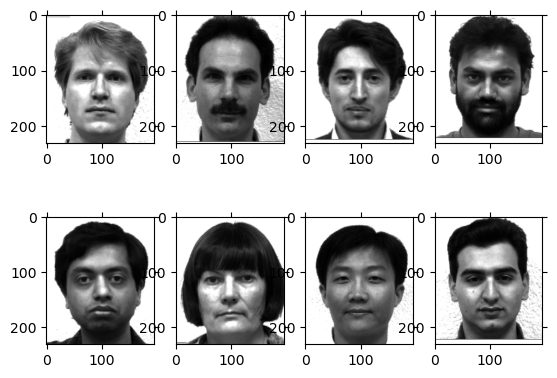

Test Images:


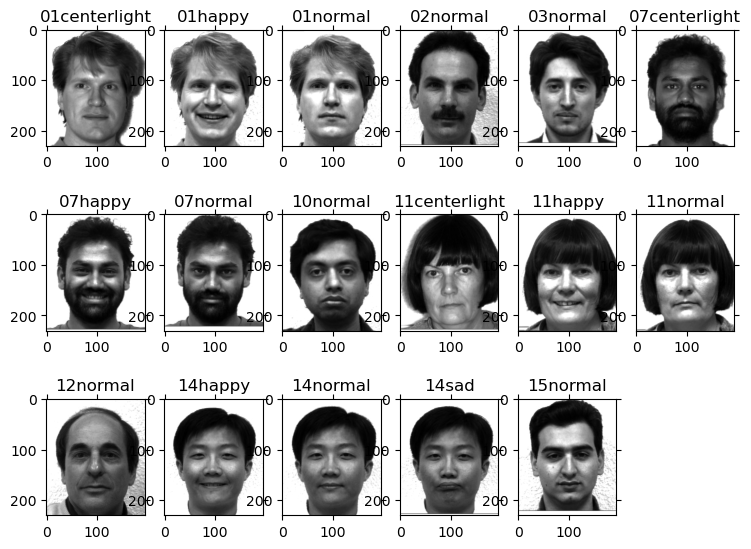

In [5]:
print('Train Images:')
train_image_names = ['subject01.normal.jpg', 'subject02.normal.jpg', 'subject03.normal.jpg', 'subject07.normal.jpg', 'subject10.normal.jpg', 'subject11.normal.jpg', 'subject14.normal.jpg', 'subject15.normal.jpg']
training_tensor   = np.ndarray(shape=(len(train_image_names), height*width), dtype=np.float64)

for i in range(len(train_image_names)):
    img = plt.imread(dataset_path + train_image_names[i])
    training_tensor[i,:] = np.array(img, dtype='float64').flatten()
    plt.subplot(2,4,1+i)
    plt.imshow(img, cmap='gray')
    plt.tick_params(labelleft='off', labelbottom='off', bottom='off',top='off',right='off',left='off', which='both')
plt.show()

print('Test Images:')
test_image_names = dataset_dir#[i for i in dataset_dir if i not in train_image_names]
testing_tensor   = np.ndarray(shape=(len(test_image_names), height*width), dtype=np.float64)

for i in range(len(test_image_names)):
    img = imread(dataset_path + test_image_names[i])
    testing_tensor[i,:] = np.array(img, dtype='float64').flatten()
    plt.subplot(3,6,1+i)
    plt.title(test_image_names[i].split('.')[0][-2:]+test_image_names[i].split('.')[1])
    plt.imshow(img, cmap='gray')
    plt.subplots_adjust(right=1.2, top=1.2)
    plt.tick_params(labelleft='off', labelbottom='off', bottom='off',top='off',right='off',left='off', which='both')
plt.show()

### Mean face

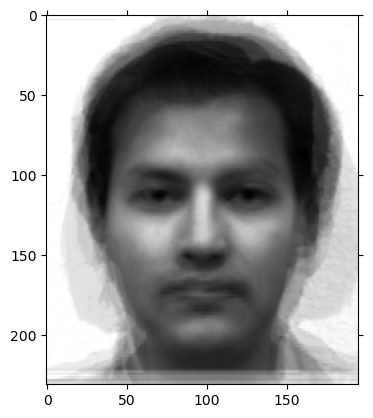

In [6]:
mean_face = np.zeros((1,height*width))

for i in training_tensor:
    mean_face = np.add(mean_face,i)

mean_face = np.divide(mean_face,float(len(train_image_names))).flatten()

plt.imshow(mean_face.reshape(height, width), cmap='gray')
plt.tick_params(labelleft='off', labelbottom='off', bottom='off',top='off',right='off',left='off', which='both')
plt.show()

### Normalised faces

In [7]:
normalised_training_tensor = np.ndarray(shape=(len(train_image_names), height*width))

for i in range(len(train_image_names)):
    normalised_training_tensor[i] = np.subtract(training_tensor[i],mean_face)

### Display normalised faces


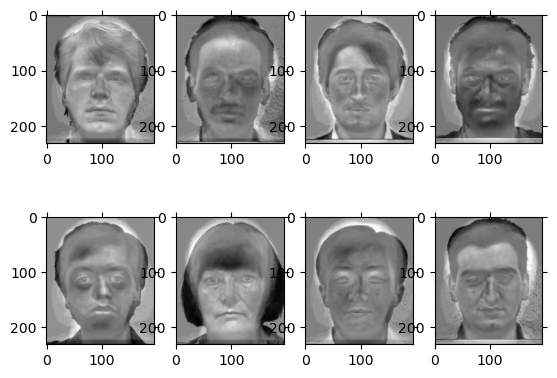

In [8]:
for i in range(len(train_image_names)):
    img = normalised_training_tensor[i].reshape(height,width)
    plt.subplot(2,4,1+i)
    plt.imshow(img, cmap='gray')
    plt.tick_params(labelleft='off', labelbottom='off', bottom='off',top='off',right='off',left='off', which='both')
plt.show()

### Plot eigen faces

Covariance matrix of X: 
[[ 240.21425354  -54.37445049  -49.91300972 -167.04449305    6.71011608
    95.13549119   51.86167951 -122.58958706]
 [ -54.37445049  271.21637481  -39.69264581   66.46457924  -62.78262301
  -159.33970561  -96.7188796    75.22735047]
 [ -49.91300972  -39.69264581  223.857185     46.24225037  -32.6657127
  -134.1771553   -35.12864547   21.47773363]
 [-167.04449305   66.46457924   46.24225037  345.77440281  -80.00529939
  -267.06328206  -73.29909108  128.93093316]
 [   6.71011608  -62.78262301  -32.6657127   -80.00529939  256.35235515
   -63.58037876   53.02911913  -77.05757652]
 [  95.13549119 -159.33970561 -134.1771553  -267.06328206  -63.58037876
   747.14220277    1.26270451 -219.37987674]
 [  51.86167951  -96.7188796   -35.12864547  -73.29909108   53.02911913
     1.26270451  238.6557604  -139.66264741]
 [-122.58958706   75.22735047   21.47773363  128.93093316  -77.05757652
  -219.37987674 -139.66264741  333.05367046]]
Eigenvectors of Cov(X): 
[[ 0.24216786 

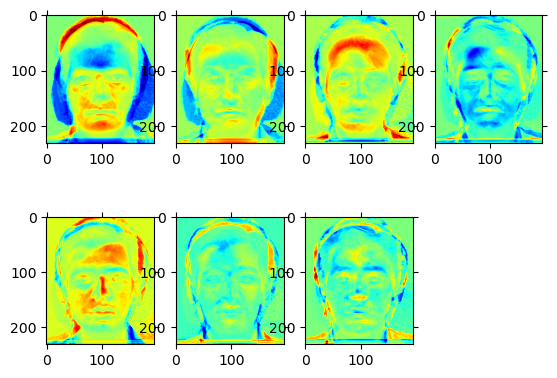

In [9]:
cov_matrix = np.cov(normalised_training_tensor)
cov_matrix = np.divide(cov_matrix,8.0)
print('Covariance matrix of X: \n%s' %cov_matrix)

eigenvalues, eigenvectors, = np.linalg.eig(cov_matrix)
print('Eigenvectors of Cov(X): \n%s' %eigenvectors)
print('\nEigenvalues of Cov(X): \n%s' %eigenvalues)

eig_pairs = [(eigenvalues[index], eigenvectors[:,index]) for index in range(len(eigenvalues))]

# Sort the eigen pairs in descending order:
eig_pairs.sort(reverse=True)
eigvalues_sort  = [eig_pairs[index][0] for index in range(len(eigenvalues))]
eigvectors_sort = [eig_pairs[index][1] for index in range(len(eigenvalues))]

reduced_data = np.array(eigvectors_sort[:7]).transpose()
proj_data = np.dot(training_tensor.transpose(),reduced_data)
proj_data = proj_data.transpose()

for i in range(proj_data.shape[0]):
    img = proj_data[i].reshape(height,width)
    plt.subplot(2,4,1+i)
    plt.imshow(img, cmap='jet')
    plt.tick_params(labelleft='off', labelbottom='off', bottom='off',top='off',right='off',left='off', which='both')
plt.show()